<a href="https://www.kaggle.com/code/hosen42/flower-classifier-with-vgg16?scriptVersionId=128796507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [2]:
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [3]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [4]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [5]:
# using vgg16,resnet ->addTopModel

In [6]:
from tensorflow.keras.utils import plot_model
Image_size = [224,224]

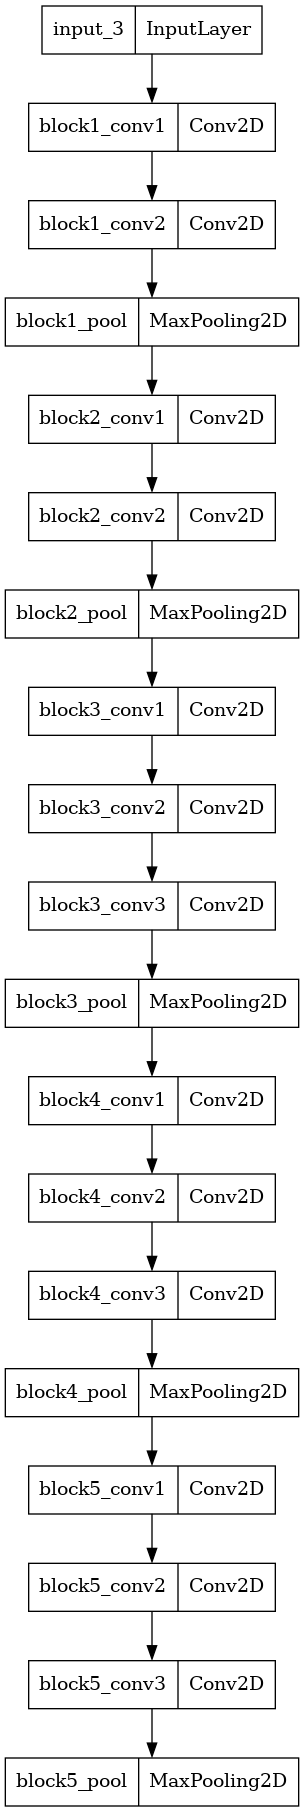

In [7]:
vgg16 = VGG16(include_top=False , input_shape=Image_size+[3],weights='imagenet')
plot_model(vgg16)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

num_classes = 17

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/input/flowers/flowers/train'
validation_data_dir = '/kaggle/input/flowers/flowers/validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
#If batch size is high than --> Time will be high and Accuracy is also high
#If batch size is low than --> Time will be taken less and Accuracy is also low 
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


 <div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Training our top layers<a id=5></a></p>
</div>


In [10]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
                    
checkpoint = ModelCheckpoint("/Trained Models/flowers_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 1190
nb_validation_samples = 170
epochs = 1
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save("Trained Models/flowers_vgg.h5")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


74/74 [==============================] - ETA: 0s - loss: 286.6166 - accuracy: 0.0477 
Epoch 1: val_loss improved from inf to 2.83199, saving model to /Trained Models/flowers_vgg.h5
74/74 [==============================] - 1235s 17s/step - loss: 286.6166 - accuracy: 0.0477 - val_loss: 2.8320 - val_accuracy: 0.0000e+00


 <div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Can we speed this up? Let's try re-sizing the image to 64 x 64<a id=5></a></p>
</div>

In [11]:
from keras.applications import VGG16

# Setting the input size now to 64 x 64 pixel 
img_rows = 64
img_cols = 64 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


 <div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Let's create our new model using an image size of 64 x 64<a id=5></a></p>
</div>


In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/input/flowers/flowers/train'
validation_data_dir = '/kaggle/input/flowers/flowers/validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Freeze layers
for layer in vgg16.layers:
    layer.trainable = False
    
# Number of classes in the Flowers-17 dataset
num_classes = 17

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                        

 <div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Training using 64 x 64 image size is MUCH faster!<a id=5></a></p>
</div>


In [13]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
                   
checkpoint = ModelCheckpoint("./Trained Models/flowers_vgg_64.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.0001),
              metrics = ['accuracy'])

nb_train_samples = 1190
nb_validation_samples = 170
epochs = 25
batch_size = 32

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save("./Trained Models/flowers_vgg_64.h5")

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


37/37 [==============================] - ETA: 0s - loss: 2.8527 - accuracy: 0.1064
Epoch 1: val_loss improved from inf to 2.49494, saving model to ./Trained Models/flowers_vgg_64.h5
37/37 [==============================] - 18s 457ms/step - loss: 2.8527 - accuracy: 0.1064 - val_loss: 2.4949 - val_accuracy: 0.3200 - lr: 1.0000e-04
Epoch 2/25
37/37 [==============================] - ETA: 0s - loss: 2.5785 - accuracy: 0.1976
Epoch 2: val_loss improved from 2.49494 to 2.39116, saving model to ./Trained Models/flowers_vgg_64.h5
37/37 [==============================] - 17s 460ms/step - loss: 2.5785 - accuracy: 0.1976 - val_loss: 2.3912 - val_accuracy: 0.3000 - lr: 1.0000e-04
Epoch 3/25
37/37 [==============================] - ETA: 0s - loss: 2.4861 - accuracy: 0.2440
Epoch 3: val_loss improved from 2.39116 to 2.21270, saving model to ./Trained Models/flowers_vgg_64.h5
37/37 [==============================] - 16s 439ms/step - loss: 2.4861 - accuracy: 0.2440 - val_loss: 2.2127 - val_accuracy: 0